**实验目标：**
通过本实验，你将学习并实践信号处理中的三个重要任务：端点检测、基音周期检测以及 MFCC 特征提取。这些任务是语音信号处理和音频处理中的基础，对于语音识别和语音分析等应用至关重要。其中，端点检测、基音周期检测实验可以二选一，MFCC特征提取实验必须完成。

**实验方法：**

**1. 端点检测：**
  - 阅读端点检测的相关文献或资料，了解双门限法的原理和实现方式。
  - 使用 Python 编程语言，实现端点检测算法。
  - 在代码中设定合适的阈值来检测端点，你可以尝试不同的阈值来获取更好的效果。
  - 编写代码以可视化端点检测结果，将检测到的端点在原始信号上标出。

**2. 基音周期检测：**
  - 学习基音周期检测的原理，理解基音周期在语音信号中的重要性。
  - 使用 librosa 库或其他音频处理库加载音频数据。
  - 探索基音周期检测的方法，并尝试实现其中一种方法。你可以使用自相关函数或其他方法来检测基音周期。
  - 编写代码以可视化基音周期检测的结果，将检测到的基音周期在音频信号上标出。

**3. MFCC 特征提取：**
  - 了解 MFCC 特征在语音信号处理中的重要性以及其在语音识别中的应用。
  - 使用 librosa 库或其他音频处理库加载音频数据。
  - 实现 MFCC 特征提取算法。
  - 编写代码以可视化提取的 MFCC 特征，观察不同时间段内的特征变化。
  
**实验要求：**

录制一段音频，并开展上述实验，并可视化实验结果，并保存图片到本地。其中实验1和2可任选一个，实验3必做。

## 一、 安装环境

In [3]:
# #安装依赖库，可以跳过已安装的库
%pip install -r requirements.txt

  Obtaining dependency information for pyaudio from https://files.pythonhosted.org/packages/82/d8/f043c854aad450a76e476b0cf9cda1956419e1dacf1062eb9df3c0055abe/PyAudio-0.2.14-cp311-cp311-win_amd64.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for librosa==0.10.1 from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for soundfile>=0.12.1 from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for pooch>=1.0

In [1]:
%pip show numpy
%pip show matplotlib
%pip show scipy
%pip show pandas
%pip show pyaudio
%pip show wave
%pip show librosa
%pip show IPython
# 如果显示WARNING: Package(s) not found,则需要安装对应依赖库

Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: d:\anaconda3\Lib\site-packages
Requires: 
Required-by: astropy, blis, bokeh, Bottleneck, contourpy, daal4py, datasets, datashader, datashape, dgl, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, librosa, matplotlib, mkl-fft, mkl-random, numba, numexpr, opencv-python, pandas, patsy, pyarrow, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, soxr, spacy, statsmodels, tables, thinc, tifffile, torchvision, transformers, xarray
Note: you may need to restart the kernel to use updated packages.
Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: d:\anaconda3\Lib\site-packages
Requires: contourpy, cycler, 

## 二、音频准备

我们鼓励大家使用自己录制的音频进行实验，下面是录制音频的简单示例，可根据自己设备的情况，对录制时长和采样率进行调整

In [13]:
#录制音频
def record_audio(duration):
    import pyaudio
    import wave

    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100
    WAVE_OUTPUT_FILENAME = "demo.wav"

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* 录音中...")

    frames = []

    for i in range(0, int(RATE / CHUNK * duration)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* 录音结束!")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
record_audio(duration=5) #录音5秒,并保存为demo.wav


In [3]:
import IPython
IPython.display.Audio('demo.wav') #播放demo.wav

In [4]:
#读取音频
import numpy as np
import scipy.io.wavfile as wav
sr, signal = wav.read('demo.wav')
print('采样率：', sr)
print("信号长度：", signal.shape)

采样率： 8000
信号长度： (32000,)


In [5]:
# 下面是一些会用到的音频处理函数
from speechlib import *
import os

## 三、端点检测
### 1. 对音频进行预处理分帧
### 2. 计算语音的短时能量：
- STEn:计算短时能量函数
<br>第n帧语音信号xn(m)的短时能量用En表示,其计算公式为：
$E_n=\sum_{m=0}^{N-1} x_n^2$

### 3. 计算语音的短时过零率：
- STZcr：计算短时过零率
<br>比较当前帧和前一帧的乘机，异号则表示过零

### 4. 利用短时能量，短时过零率，使用双门限法进行端点检测
- vad_TwoThr：使用双门限法进行端点检测
- 基础逻辑：

    根据短时能量，短时过零率，分别确定可能开始和确定开始的阈值

    遍历每一帧，根据当前状态和短时能量、短时过零率的值，进行状态转移和计数操作：

    1. 当状态为静音或者可能开始时，继续找语音段的起始点；
    2. 当状态为确定开始时，表示已确定开始语音段，继续计数直到满足终止条件；
    3. 当状态为语音段时，表示已找到语音段，将语音段的起点和终点记录下来并重置计数器。
    
    最后，根据语音段的起点和终点，生成语音段标记和非语音段标记，并返回语音段的起点和终点，语音段数，语音段标记，非语音段标记，短时能量和短时过零率。





实验1-1：基于双门限法的端点检测
需要补充下列方法: STEn、STZcr、vad_TwoThr

所有需要补充的代码都注释有TODO, 按要求补充即可

In [69]:
def STEn(x: object, win: object, inc: object) -> object:
    """
    计算短时能量函数
    :param x: 语音信号
    :param win: 窗长
    :param inc: 帧移
    :return: 短时能量，即每一帧的能量
    """
    # TODO 需要补充
    # 1.分帧
    frame = enframe(x, win, inc)
    # 2.计算短时能量
    sten = np.multiply(frame, frame)
    # 3.返回短时能量
    return np.sum(sten, axis=1)

def STZcr(x, win, inc, delta=0):
    """
    计算短时过零率
    :param x: 语音信号
    :param win: 窗长
    :param inc: 帧移
    :return: 短时过零率，即每一帧的过零率
    """
    # TODO 需要补充
    # 0.去除x中幅值小于delta的信号
    absx = np.abs(x)
    x = np.where(absx < delta, 0, x)
    # 1.分帧
    frame = enframe(x, win, inc)
    # 2.计算短时过零率
    frame1 = frame[:, :-1]
    frame2 = frame[:, 1:]
    stzcr = np.mean(np.sign(frame1 * frame2) < 0, axis=1)
    # 3.返回短时过零率
    return stzcr

def vad_TwoThr(x, wlen, inc, NIS):
    """
    使用门限法进行端点检测
    :param x: 语音信号
    :param wlen: 分帧长度
    :param inc: 帧移
    :param NIS: 用于计算门限的无话段长度
    :return: 语音段的起始点和终止点，语音段数，语音段标记，非语音段标记，短时能量，短时过零率
    """
    maxsilence = 15
    minlen = 5
    status = 0
    y = enframe(x, wlen, inc)# TODO 需要补充：调用enframe方法进行分帧
    fn = y.shape[0] # 帧数
    amp = STEn(x, wlen, inc) # 计算短时能量, 需要在上方方法定义里补充
    zcr = STZcr(x, wlen, inc, delta=0.01) # 计算短时过零率, 需要在上方方法定义里补充
    ampth = np.mean(amp[:NIS]) # 计算短时能量的平均值
    zcrth = np.mean(zcr[:NIS]) # 计算短时过零率的平均值
    amp2 = 2 * ampth #判断可能开始阈值
    amp1 = 4 * ampth #判断确定开始阈值
    zcr2 = 2 * zcrth #判断可能开始阈值
    xn = 0 #当前语音段索引
    count = np.zeros(fn) #存储每个帧的计数值
    silence = np.zeros(fn) #存储每个帧的静音计数值
    x1 = np.zeros(fn) #存储每个语音段的起始帧索引
    x2 = np.zeros(fn) #存储每个语音段的终止帧索引
    for n in range(fn):
    # 0-静音，1-可能开始，2-确定开始，3-语音段
    
        if status == 0 or status == 1:
            if amp[n] > amp1: # 语音段的起始点
                x1[xn] = n #TODO 需要补充
                status = 2
                silence[xn] = 0
                count[xn] += 1
            elif amp[n] > amp2 or zcr[n] > zcr2: # 可能开始
                status = 1
                count[xn] += 1
            else: # 静音
                status = 0
                count[xn] = 0
                x1[xn] = 0
                x2[xn] = 0

        elif status == 2:
            if amp[n] > amp1:# TODO 需要补充
                count[xn] += 1
            else:
                silence[xn] += 1
                if silence[xn] < maxsilence:
                    count[xn] += 1
                elif count[xn] < minlen:
                    status = 0
                    silence[xn] = 0
                    count[xn] = 0
                else:
                    status = 3
                    x2[xn] = x1[xn] + count[xn]
        elif status == 3:
            status = 0
            xn += 1
            count[xn] = 0
            silence[xn] = 0
            x1[xn] = 0
            x2[xn] = 0
    el = len(x1[:xn])
    if x1[el - 1] == 0:
        el -= 1
    if x2[el - 1] == 0:
        print('Error: Not find endding point!\n')
        x2[el] = fn
    SF = np.zeros(fn)
    NF = np.ones(fn)
    for i in range(el):
        SF[int(x1[i]):int(x2[i])] = 1 # 语音段标记
        NF[int(x1[i]):int(x2[i])] = 0 # 非语音段标记
    voiceseg = findSegment(np.where(SF == 1)[0]) # 找到语音段
    vsl = len(voiceseg.keys())
    return voiceseg, vsl, SF, NF, amp, zcr # 返回语音段的起始点和终止点，语音段数，语音段标记，非语音段标记，短时能量，短时过零率

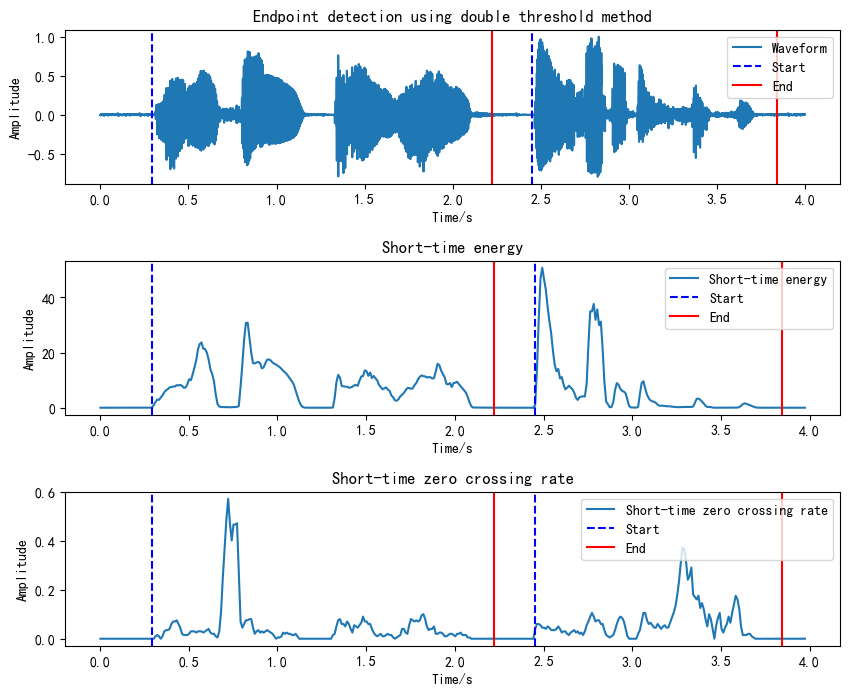

In [70]:
(fs, data) = wavfile.read('demo.wav') # 读取音频
data1 = data/np.max(np.abs(data))     # 幅值归一化

N = len(data1)
wlen = 200
inc = 80
IS = 0.1
overlap = wlen - inc
NIS = int((IS * fs - wlen) // inc + 1)
fn = (N - wlen) // inc + 1

frameTime = FrameTimeC(fn, wlen, inc, fs) # 计算每帧的时间刻度
time = [i / fs for i in range(N)]

voiceseg, vsl, SF, NF, amp, zcr = vad_TwoThr(data1, wlen, inc, NIS) # 语音段检测

# 打印语音段信息
fig, axs = plt.subplots(3, 1, figsize=(10, 8))  # Adjust figsize as needed 调整子图大小
plt.subplots_adjust(hspace=0.5)  # Adjust hspace for vertical spacing between subplots 调整子图间的垂直间距

axs[0].plot(time, data1)
axs[0].set_title('Endpoint detection using double threshold method')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time/s')

axs[1].plot(frameTime, amp)
axs[1].set_title('Short-time energy')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Time/s')

axs[2].plot(frameTime, zcr)
axs[2].set_title('Short-time zero crossing rate')
axs[2].set_ylabel('Amplitude')
axs[2].set_xlabel('Time/s')

# 画出语音段的起始和终止点
for i in range(vsl):
    nx1 = voiceseg[i]['start']
    nx2 = voiceseg[i]['end']

    axs[0].axvline(frameTime[nx1], np.min(data1), np.max(data1), color='blue', linestyle='--')
    axs[0].axvline(frameTime[nx2], np.min(data1), np.max(data1), color='red', linestyle='-')
    axs[0].legend(['Waveform', 'Start', 'End'])

    axs[1].axvline(frameTime[nx1], np.min(amp), np.max(amp), color='blue', linestyle='--')
    axs[1].axvline(frameTime[nx2], np.min(amp), np.max(amp), color='red', linestyle='-')
    axs[1].legend(['Short-time energy', 'Start', 'End'])
    
    axs[2].axvline(frameTime[nx1], 0, 1, color='blue', linestyle='--')
    axs[2].axvline(frameTime[nx2], 0, 1, color='red', linestyle='-')
    axs[2].legend(['Short-time zero crossing rate', 'Start', 'End'], loc='upper right')

os.makedirs('figs', exist_ok=True) # 创建文件夹
plt.savefig('figs/vad.png') # 保存图片
plt.show()



## 四、基音周期检测
- 基音是指发浊音时声带振动所引起的周期性，而基音周期是指声带振动频率的倒数，它描述了语音激励源的一个重要特征

- 对于基于自相关法的基音周期检测，可以首先计算义Sn(m)的自相关函数：$R_n(k)=\sum_{m=0}^{N-k-1} S_n(m)S_n(m+k)$

- 由于浊音信号的自相关函数在基音周期的整数倍位置上出现峰值；而清音的自相关函数没有明显的峰值出现，因此可以根据是否有峰值提取基音周期值

- pitch_Corr函数:


    分帧处理

    使用pitch_vad函数对语音信号进行VAD处理，得到语音段的起始时间和持续时间，以及前导零数和能量等信息

    对每个语音段进行循环：
            
    1. 获取当前语音段的起始时间ixb和持续时间ixd
        
    2. 对语句段中的每一帧：
            
        1)计算自相关函数，取正半部分（自相关函数对称）

        2)结合lmin和lmax的范围限制，获取峰值索引，得到基音周期的估计值，并将其存储在period数组中
        

- 算法思想：
  整个算法的核心是利用自相关函数在有周期信号存在时的性质（即自相关值大）来估计信号周期。自相关函数度量了信号与其延时版本的相似度，对于周期信号，当延时等于一个或多个周期时，这种相似度最大。通过寻找自相关函数的峰值，我们可以得出基音周期的估计。基于门限 T1 的语音活动检测使得仅对包含语音的帧执行周期估计，从而提高了估计的准确性和效率。

实验1-2：基于自相关法的基音周期检测
需要补充下列方法: pitch_Corr

In [71]:
import numpy as np

def pitch_Corr(x, wnd, inc, T1, fs, miniL=10):
    """
    自相关法基音周期检测函数
    :param x: 语音信号
    :param wnd: 窗函数或窗长
    :param inc: 帧移,即分帧时每一帧跨过的样本数
    :param T1: 门限
    :param fs: 采样率
    :param miniL: 语音段的最小帧数
    :return voiceseg, vsl, SF, Ef, period: 语音段的起始点和终止点，语音段数，语音段标记，非语音段标记，基音周期
    """
    y = enframe(x, wnd, inc)  # 调用enframe方法进行分帧
    fn = y.shape[0] #存储分帧后的帧数
    if isinstance(wnd, int):
        wlen = wnd
    else:
        wlen = len(wnd)
    voiceseg, vsl, SF, Ef = pitch_vad(x, wnd, inc, T1, miniL)  # 语音分段,它的作用是对语音信号进行活动检测，将语音段和非语音段进行区分。
    lmin = fs // 500  # 基音周期的最小值
    lmax = fs // 60  # 基音周期的最大值
    period = np.zeros(fn)
    for i in range(vsl):    # 在所有语音段中
        ixb = voiceseg[i]['start']  # 语音段的起始帧
        ixd = voiceseg[i]['duration']  # 语音段的帧数
        for k in range(ixd):
            # TODO 需要补充：输入y, 调用np.correlate计算短时自相关,并找到最大值,返回自相关函数ru
            frame = y[ixb + k]  # 当前帧
            ru = np.correlate(frame, frame, mode='full')  #np.correlate 计算信号与其自身的滞后版本的相关性。模式'full'返回每一个可能延迟的自相关值
            ru = ru[len(frame)-1:]  # 保留正半部分，因为自相关函数是对称的
            # TODO 需要补充：输入ru找到范围内短时自相关最大值的标号,将其作为基音周期的估值,并存入period
            rmaxIndex = np.argmax(ru[lmin:lmax+1]) + lmin  #  ru[lmin:lmax+1] 是指在允许的延时范围内搜索自相关最大值的索引，然后加上 lmin 得到实际的样本延迟
            period[ixb+k] = rmaxIndex  # 基音周期估值
    return voiceseg, vsl, SF, Ef, period

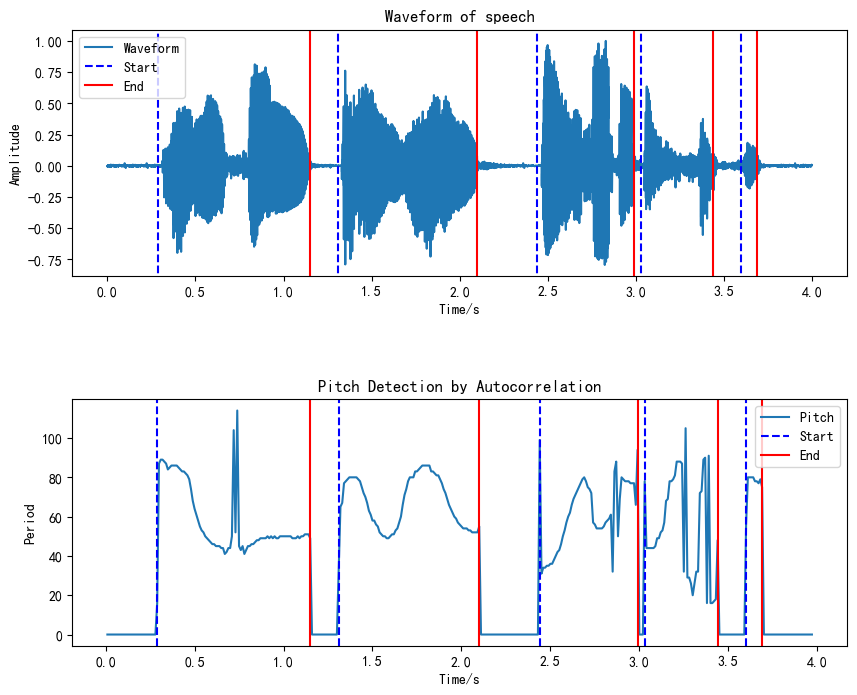

In [72]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 读取WAV文件
(fs, data) = wavfile.read('demo.wav')

# 去除直流偏移
data = data - np.mean(data)

# 幅值归一化
data = data / np.max(data)

# 分析参数
wlen = 320  # 分析窗口长度
inc = 80    # 连续窗口间隔
N = len(data)
time = [i / fs for i in range(N)]  # 时间向量
T1 = 0.05  # 用于基音校正的阈值

# 进行基音校正并检测有声段
voiceseg, vsl, SF, Ef, period = pitch_Corr(data, wlen, inc, T1, fs)

# 计算帧数
fn = len(SF)

# 计算帧时间位置
frameTime = FrameTimeC(fn, wlen, inc, fs)

# 设置子图布局
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)  # 调整垂直间距

# 绘制波形图
axs[0].plot(time, data)
axs[0].set_title('Waveform of speech')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time/s')

# 绘制自相关基音周期检测图
axs[1].plot(frameTime, period)
axs[1].set_title('Pitch Detection by Autocorrelation')
axs[1].set_ylabel('Period')
axs[1].set_xlabel('Time/s')

# 标记有声段
for i in range(vsl):
    nx1 = voiceseg[i]['start']
    nx2 = voiceseg[i]['end']

    # 在波形图上标记有声段
    axs[0].axvline(frameTime[nx1], np.min(data), np.max(data), color='blue', linestyle='--')
    axs[0].axvline(frameTime[nx2], np.min(data), np.max(data), color='red', linestyle='-')

    # 在自相关基音周期检测图上标记有声段
    axs[1].axvline(frameTime[nx1], np.min(period), np.max(period), color='blue', linestyle='--')
    axs[1].axvline(frameTime[nx2], np.min(period), np.max(period), color='red', linestyle='-')

axs[0].legend(['Waveform', 'Start', 'End'])
axs[1].legend(['Pitch', 'Start', 'End'])

os.makedirs('figs', exist_ok=True) # 创建文件夹
plt.savefig('figs/pitch.png') # 保存图片
plt.show()





## 五、MFCC提取
MFCC是在Mel标度频率域提取出来的倒谱参数，Mel标度描述了人耳频率的非线性特性。

MFCC提取过程：预加重，分帧，加窗，FFT，MEL滤波器组，对数运算，DCT
### 1. 预加重：
目的：
<br>提升高频部分，使信号的频谱变得平坦，保持在低频到高频的整个频带中，能用同样的信噪比求频谱
<br>消除发生过程中声带和嘴唇的效应，来补偿语音信号受到发音系统所抑制的高频部分
<br>突出高频的共振峰

scipy.signal.lfilter([1, -0.97], 1, x)：对输入信号x应用一个一阶滤波器，该滤波器的分子为1和-0.97，分母为1。
### 2. 分帧：
目的：声音中的频率随时间而变化，所以在大多数情况下，对整个信号进行傅立叶变换是没有意义的，分帧的目的是在极短的时间内假设声音不是变化的，方便对其进一步运算。

enframe(x_preemphasized, frameSize, inc)的作用是将预加重后的输入信号x_preemphasized分帧，每个帧的大小为frameSize，帧之间重叠inc个采样点
### 3. 加窗：
目的：为了抵消FFT所假设的数据是无限的，并减少频谱泄漏，使用汉宁窗对其进行加窗，也可以使用哈明窗，只是加权系数不同，但都是余弦窗，但使用矩形窗无法实现

将窗函数用于每个帧
### 4. 计算FFT：
快速傅里叶变换：$X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2\pi kn/N}$

由于声音在时域上的变换通常很难看出信号的特性，所以通常使用快速傅里叶变换将它转换为频域上的能量分布来观察，不同的能量分布，就能代表不同语音的特性。
### 5. 计算能量谱：
在计算能量谱时，计算快速傅里叶变换后得到的值是复数，需要取模:$P_{xx}[k] = \lvert X[k] \rvert^2$
### 6. mel滤波器
作用：对频谱进行平滑化，并消除谐波的作用，突显原先语音的共振峰。降低计算量。

melbankm(p, nfft, fs, 0, 0.5 * fs, 0)的作用是计算一个Mel滤波器组，其中包含p个滤波器，对应于频率范围从0到采样率的一半。$S_{mel}[m] = \sum_{k} P_{xx}[k] W_{mel}[m][k]$
### 7. 计算DCT：
前一步计算出的滤波器组系数高度相关，这在某些机器学习算法中可能存在问题。因此应用离散余弦变换去相关滤波器组系数并产生滤波器组的压缩表示。对于自动语音识别，所得到的倒谱系数2-13被保留，其余的被丢弃; num_ceps = 12。丢弃其他系数的原因是它们表示滤波器组系数的快速变化，并且这些细节不会有助于自动语音识别。

DCT公式:$C[n] = \sum_{m=0}^{M-1} \log(S_{mel}[m])\cos(n\pi(m+0.5)/M)$
（log的作用：log运算是为了分别包络和细节，包络代表音色，细节带包音高，显然语音识别就是为了识别音色。另外，人的感知与频率的对数成正比，正好使用log模拟）

实验1-3：MFCC提取
需要补充下列方法: Nmfcc

In [73]:
def Nmfcc(x, fs, p, frameSize, inc, nfft=512, n_dct=12):
    """
    计算mfcc系数
    :param x: 输入信号
    :param fs: 采样率
    :param p: Mel滤波器组的个数
    :param frameSize: 分帧的每帧长度
    :param inc: 帧移
    :return: mfcc系数
    """
    # 预加重处理
    x_preemphasized = scipy.signal.lfilter([1, -0.97], 1, x)

    # 分帧
    frames = enframe(x_preemphasized, frameSize, inc)

    # 加窗，输入frames, 调用np.hanning和np.multiply方法进行加窗
    frames = np.multiply(frames, np.hanning(frameSize))
    
    # 计算FFT
    fft_result = np.fft.rfft(frames, n=nfft)

    # 计算能量谱
    power_spectrum = np.abs(fft_result) ** 2
    
    # 计算通过Mel滤波器的能量
    bank = melbankm(p, nfft, fs, 0, 0.5 * fs, 0)
    ss = np.matmul(power_spectrum, bank.T)
    
    # 计算DCT倒谱
    M = bank.shape[0]  # 滤波器个数
    m = np.array([i for i in range(M)])
    mfcc = np.zeros((ss.shape[0], n_dct))  # 初始化mfcc系数
    for n in range(n_dct):
        mfcc[:, n] = np.dot(np.log10(ss), np.cos(np.pi * n / M * (m + 0.5)))
    return mfcc


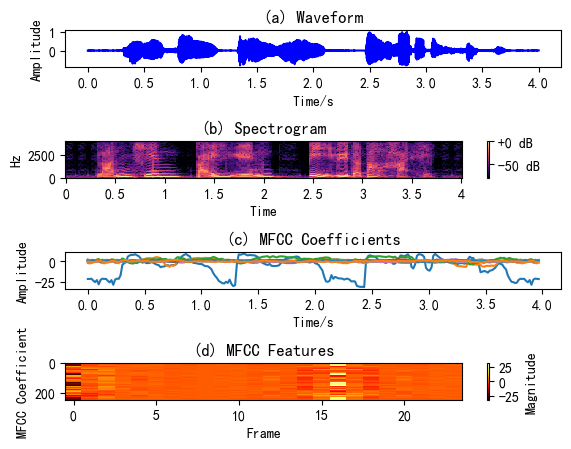

In [74]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import scipy
# 读取WAV文件
(framerate, wave_data) = wavfile.read("demo.wav")

# 参数设置
wlen = 256
inc = 128
num = 8
nfft = 256
n_dct = 24

# 归一化处理
x = wave_data / max(np.abs(wave_data))
time = np.arange(0, len(wave_data)) / framerate

# 绘制原始波形
plt.figure(1)
plt.subplot(411)
plt.plot(time, x, 'b')
plt.title("(a) Waveform")
plt.ylabel("Amplitude")
plt.xlabel("Time/s")

# 计算MFCC特征
ccc1 = librosa.feature.mfcc(y=x,
                            n_fft=wlen,
                            sr=framerate,
                            n_mfcc=24,
                            fmax=4000,
                            dct_type=2,
                            hop_length=inc,
                            win_length=wlen)
ccc2 = np.transpose(ccc1)

# 进行NMFCC计算
ccc1 = Nmfcc(x, framerate, num, wlen, inc, nfft, n_dct)
fn = ccc1.shape[0]
cn = ccc1.shape[1]
frameTime = FrameTimeC(fn, wlen, inc, framerate)

# # 计算语谱图
D = librosa.stft(x, n_fft=wlen, hop_length=inc)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# 绘制语谱图
plt.subplot(412)
librosa.display.specshow(D_db, sr=framerate, hop_length=inc, x_axis='time', y_axis='linear')
plt.title("(b) Spectrogram")
plt.colorbar(format='%+2.0f dB')

# 绘制MFCC系数
plt.subplot(413)
plt.plot(frameTime, ccc1[:, 0:int(cn/2)])
plt.title("(c) MFCC Coefficients")
plt.ylabel("Amplitude")
plt.xlabel("Time/s")




# 绘制MFCC特征图
plt.subplot(414)
plt.imshow(ccc1, cmap='hot', interpolation='nearest', aspect='auto')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.title('(d) MFCC Features')
plt.colorbar(label='Magnitude')

# 调整子图间距
plt.subplots_adjust(hspace=2)

os.makedirs('figs', exist_ok=True) # 创建文件夹
plt.savefig('figs/mfcc.png') # 保存图片
plt.show()





